## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nlp import preprocessing as pp
import nltk

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="dark")
sns.set(font_scale=1.85)

#### Load in the Cambridge Readability Data Frame

In [4]:
df = pd.read_csv('data/cefr_readings.csv')

In [5]:
df.head()

,documents,cefr_level
0,Not many people have seen an otter. These anim...,A2
1,"Dear Sir, I read your advertisement for Englis...",A2
2,The bicycle is a cheap and clean way to travel...,A2
3,Bill Prince-Smith was a farmer and a teacher a...,A2
4,"When Esther left school at the age of sixteen,...",A2


#### Break the Data Frame into pieces sentence-wise

In [6]:
sent_df = pp.get_sentences(df, 'documents', 'cefr_level')

In [7]:
sentence_df = pd.DataFrame.from_records(sent_df, columns=['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'])
sentence_df

,text,num_of_words,avg_len_words,level,doc_id
0,Not many people have seen an otter.,7,4.00,A2,0
1,These animals live near rivers and make their ...,14,4.57,A2,0
2,They usually come out of their homes at night.,9,4.11,A2,0
3,Otters are very good in the water and can swim...,17,3.82,A2,0
4,They have thick brown hair and this keeps them...,13,4.00,A2,0
...,...,...,...,...,...
9429,Utility and Function are not part of this defi...,43,4.98,C2,327
9430,The origins of classical architecture are comp...,7,6.14,C2,327
9431,There was obviously a long prehistory of basic...,31,5.13,C2,327
9432,"Though these were, by definition, inartistic t...",22,6.73,C2,327


#### Examine the length of the readings by level: 

### The chart below show the average number of words and length of the words per document

In [8]:
sentence_df.groupby(['level', 'doc_id']).mean()

num_of_words  avg_len_words
level doc_id                             
A2    0          12.600000       4.165000
      1           9.700000       4.121000
      2          11.300000       4.464000
      3          14.571429       4.057143
      4          13.928571       3.998571
...                    ...            ...
C2    323        20.952381       4.623810
      324        21.714286       4.912857
      325        17.222222       4.395000
      326        27.031250       5.298437
      327        25.083333       5.043333

[328 rows x 2 columns]

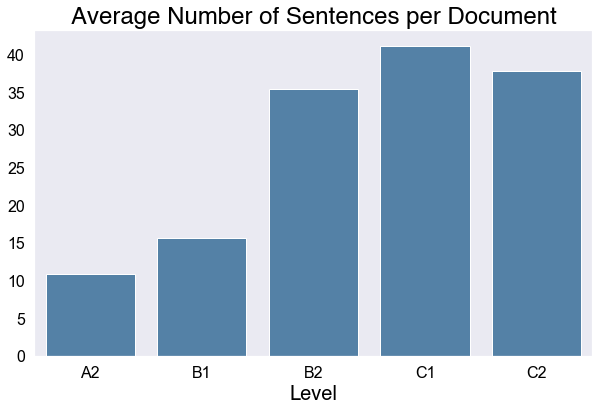

In [9]:
avg = sentence_df.groupby(['level', 'doc_id']).count()['text'].groupby('level').mean()
df = pd.DataFrame({'Level':['A2', 'B1', 'B2', 'C1', 'C2'], 'avg_number_sentences': avg})
# ax = df.plot.bar(x='Level', y='Avg Number of Sentences', rot=0).set(title='Average Number of Sentences per Document')

font = {
    'family': 'Helvetica',
    'color': 'black',
    'weight': 'bold',
    'size': 24,
}
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data=df, x='Level', y='avg_number_sentences', color='steelblue')
plt.xticks(fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')
plt.title(label='Average Number of Sentences per Document', fontdict=font)

font['size'] = 20
plt.xlabel("Level", fontdict=font)
plt.ylabel("", fontdict=font)

plt.show()

In [10]:
avg_sentences = avg.tolist()
levels = ['A2', 'B1', 'B2', 'C1', 'C2']
x = range(5)

In [11]:
avg_sentences

[10.984375,
 15.683333333333334,
 35.48529411764706,
 41.23880597014925,
 37.88405797101449]

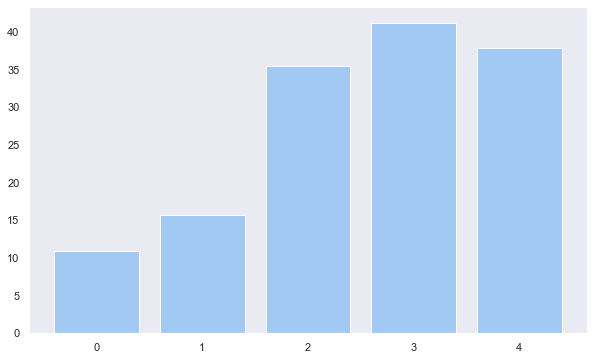

In [12]:
plt.bar(x, avg_sentences)
plt.show;

In [13]:
sentence_df.columns

Index(['text', 'num_of_words', 'avg_len_words', 'level', 'doc_id'], dtype='object')

In [14]:
# avg = sentence_df.groupby(['level']).count()['text']
avg = sentence_df.groupby(['level']).sum()['num_of_words'] / sentence_df.groupby(['level']).count()['text']

avg

# df = pd.DataFrame({'Level':['A2', 'B1', 'B2', 'C1', 'C2'], 'Total Number of Sentences': avg})
# ax = df.plot.bar(x='Level', y='Total Number of Sentences', rot=0)

level
A2    12.896159
B1    17.442083
B2    17.701202
C1    18.955121
C2    20.164881
dtype: float64

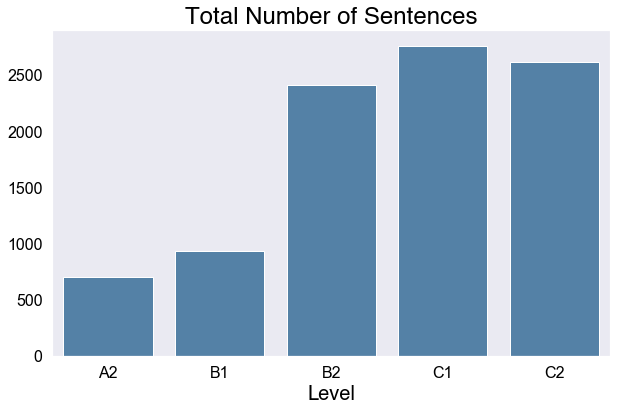

In [15]:
avg = sentence_df.groupby(['level']).count()['text']

df = pd.DataFrame({'Level':['A2', 'B1', 'B2', 'C1', 'C2'], 'Total Number of Sentences': avg})

font = {
    'family': 'Helvetica',
    'color': 'black',
    'weight': 'bold',
    'size': 24,
}
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data=df, x='Level', y='Total Number of Sentences', color='steelblue')
plt.xticks(fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')
plt.title(label='Total Number of Sentences', fontdict=font)

font['size'] = 20
plt.xlabel("Level", fontdict=font)
plt.ylabel("", fontdict=font)

plt.show()

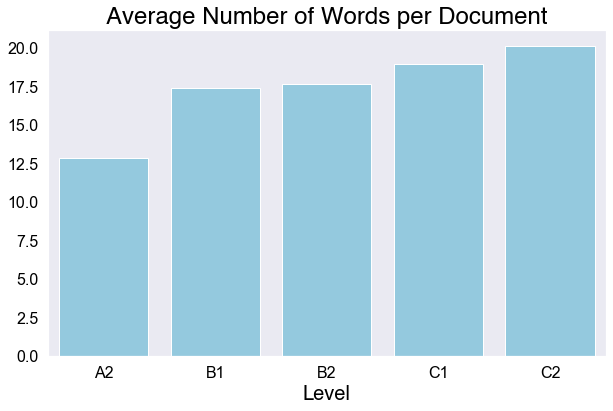

In [16]:
avg = sentence_df.groupby(['level']).mean()['num_of_words']

df = pd.DataFrame({'Level':['A2', 'B1', 'B2', 'C1', 'C2'], 'Average Number of Words per Level': avg})

font = {
    'family': 'Helvetica',
    'color': 'black',
    'weight': 'bold',
    'size': 24,
}
sns.set_theme(style="dark", palette="pastel")
sns.barplot(data=df, x='Level', y='Average Number of Words per Level', color='skyblue')
plt.xticks(fontsize=16, color='black')
plt.yticks(fontsize=16, color='black')
plt.title(label='Average Number of Words per Document', fontdict=font)

font['size'] = 20
plt.xlabel("Level", fontdict=font)
plt.ylabel("", fontdict=font)

plt.show()

### Look at the average number of words per document versus the average words length

In [17]:
sns.set_theme(style="dark", font_scale=1.85)

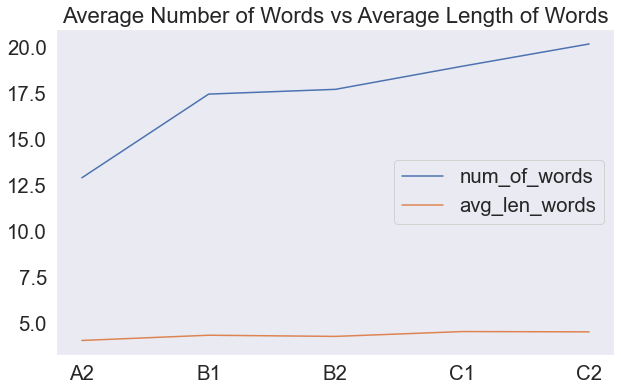

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
word_data = sentence_df.groupby(['level']).mean()[['num_of_words', 'avg_len_words']]
plt.plot(word_data)
plt.title(label='Average Number of Words vs Average Length of Words')
plt.legend(word_data.columns, loc="center right")
plt.show()

In [19]:
# Reload the data
df = pd.read_csv('data/cefr_readings.csv')

In [20]:
# df.cefr_level

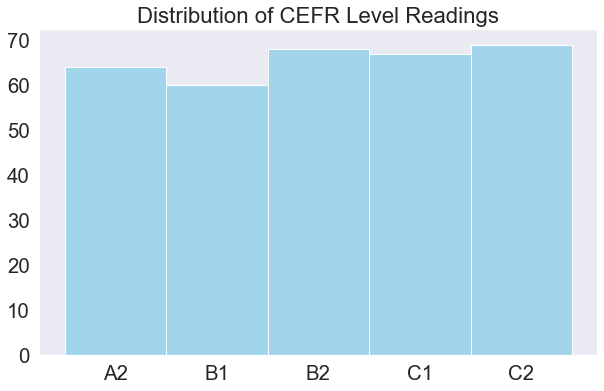

In [21]:
sns.histplot(data=df.cefr_level, color="skyblue").set(title='Distribution of CEFR Level Readings')
sns.set_theme(style="dark", font_scale=1.85)
plt.xlabel("")
plt.ylabel("")
plt.show()
# plt.hist(df.cefr_level)
# plt.title('Distribution of CEFR Level Readings');

In [22]:
# plt.close('all')
# sns.histplot(data=df.cefr_level, color="skyblue").set(title='Distribution of CEFR Level Readings')
# sns.set_theme(style="dark", font_scale=4)
# plt.xlabel("")
# plt.ylabel("")
# plt.show()

## More Exploratory Data Analysis on combined Cambridge and One-Stop Data Sets

In [23]:
sentence_df = pp.preprocess_all(sentence_df, 'text')
stats = pp.get_tokenized_word_stats(df, 'documents')

In [24]:
df_stats = pd.DataFrame.from_records(stats, columns =['total_words', 'total_sentences', 'avg_sent_len', 'max_sent_len', 'min_sent_len'])
df_stats['avg_sent_len'] = round(df_stats.avg_sent_len, 2)
df_stats

,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,126,10,12.60,23,7
1,97,10,9.70,15,3
2,113,10,11.30,20,5
3,204,14,14.57,26,7
4,195,14,13.93,22,6
...,...,...,...,...,...
323,440,21,20.95,43,5
324,1064,49,21.71,57,4
325,930,54,17.22,77,4
326,865,32,27.03,64,8


In [25]:
data = pd.merge(df, df_stats, left_index=True, right_index=True) # df.join(df_stats) is the same: AN INNER JOIN
data

,documents,cefr_level,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,Not many people have seen an otter. These anim...,A2,126,10,12.60,23,7
1,"Dear Sir, I read your advertisement for Englis...",A2,97,10,9.70,15,3
2,The bicycle is a cheap and clean way to travel...,A2,113,10,11.30,20,5
3,Bill Prince-Smith was a farmer and a teacher a...,A2,204,14,14.57,26,7
4,"When Esther left school at the age of sixteen,...",A2,195,14,13.93,22,6
...,...,...,...,...,...,...,...
323,It may have been a wish for self-adornment tha...,C2,440,21,20.95,43,5
324,Theodore Zeldin looks at how our working life ...,C2,1064,49,21.71,57,4
325,When I was at university I decided I wanted to...,C2,930,54,17.22,77,4
326,'Broadcasting' originally meant sowing seeds b...,C2,865,32,27.03,64,8


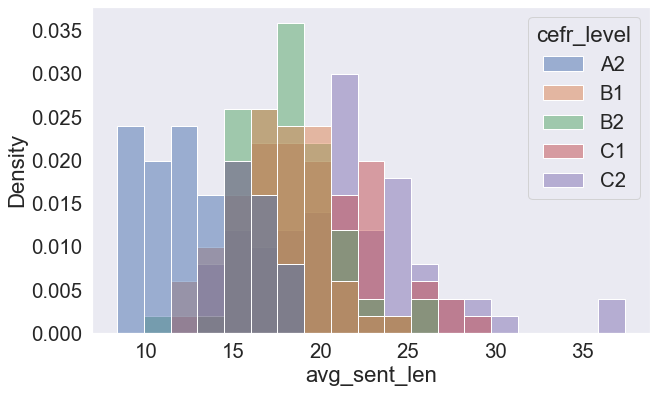

In [26]:
# data[data.cefr_level == 'C2']['max_sent_len']
sns.histplot(data=data, x='avg_sent_len', hue='cefr_level', stat="density");


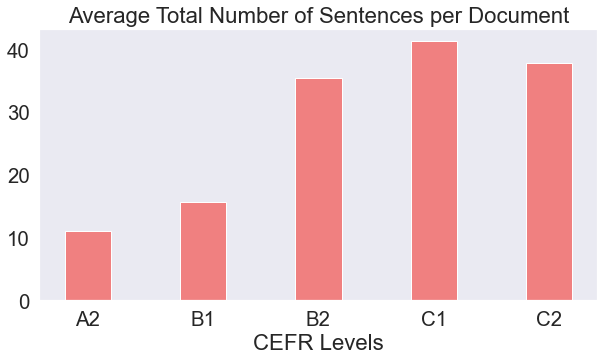

In [28]:
numb = data.groupby('cefr_level')['total_sentences'].mean().tolist()

num_d = {'A2': numb[0], 'B1': numb[1], 'B2': numb[2], 'C1': numb[3], 'C2': numb[4]}
num_d


levels = list(num_d.keys())
words = list(num_d.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(levels, words, color ='lightcoral',
        width = 0.4)
 
plt.xlabel("CEFR Levels")
# plt.ylabel("Total Number of Words")
plt.title("Average Total Number of Sentences per Document")
plt.show()

In [29]:
levels = data.groupby('cefr_level')['total_words'].mean().index.tolist()
levels

['A2', 'B1', 'B2', 'C1', 'C2']

In [30]:
data

,documents,cefr_level,total_words,total_sentences,avg_sent_len,max_sent_len,min_sent_len
0,Not many people have seen an otter. These anim...,A2,126,10,12.60,23,7
1,"Dear Sir, I read your advertisement for Englis...",A2,97,10,9.70,15,3
2,The bicycle is a cheap and clean way to travel...,A2,113,10,11.30,20,5
3,Bill Prince-Smith was a farmer and a teacher a...,A2,204,14,14.57,26,7
4,"When Esther left school at the age of sixteen,...",A2,195,14,13.93,22,6
...,...,...,...,...,...,...,...
323,It may have been a wish for self-adornment tha...,C2,440,21,20.95,43,5
324,Theodore Zeldin looks at how our working life ...,C2,1064,49,21.71,57,4
325,When I was at university I decided I wanted to...,C2,930,54,17.22,77,4
326,'Broadcasting' originally meant sowing seeds b...,C2,865,32,27.03,64,8


In [31]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 

def multi_plotter(data, filter_col, plot_col, plot_label):
    sns.set_theme(style="dark")

    fig, axs = plt.subplots(2, 3, figsize=(12,8), sharey='row')
    
#     levels = data.groupby(filter_col)['total_words'].mean().index.tolist()
    levels = data.groupby(filter_col)[plot_col].mean().index.tolist()


    for i, level in enumerate(levels):
        if i in range(3):
            j = 0
        else:
            j = 1
            i = i - 2
        if level[0] == 'C':
            colour = 'skyblue'
        elif level[0] == 'B':
            colour = 'red'
        else:
            colour = 'teal'        


#         plot_data = data[data.cefr_level == level]['avg_sent_len']
        plot_data = data[data[filter_col] == level][plot_col]

    #     sns.histplot(data=plot_data, color=colour, bins=15, kde=False, ax=axs[j, i], legend=True)

        axs[j, i].hist(plot_data, color=colour)
        axs[j, i].set_title(label=level)
        axs[j, i].set_xlabel(plot_label)
        axs[j, i].set_ylabel('')

    axs[1, 0].set_facecolor('white')
    axs[1, 0].set_xticklabels([])
    axs[1, 0].set_yticklabels([])    

    fig.tight_layout()
    plt.show()
    
# fig.legend(loc='center right')


# sns.histplot(data=data[data.cefr_level == 'C2']['total_words'], color="skyblue", label="C2", kde=True)
# sns.histplot(data=data[data.cefr_level == 'C1']['total_sentences'], color="teal", label="C2", kde=True)
# sns.histplot(data=data[data.cefr_level == 'A2']['total_sentences'], color="red", label="A2", kde=True)

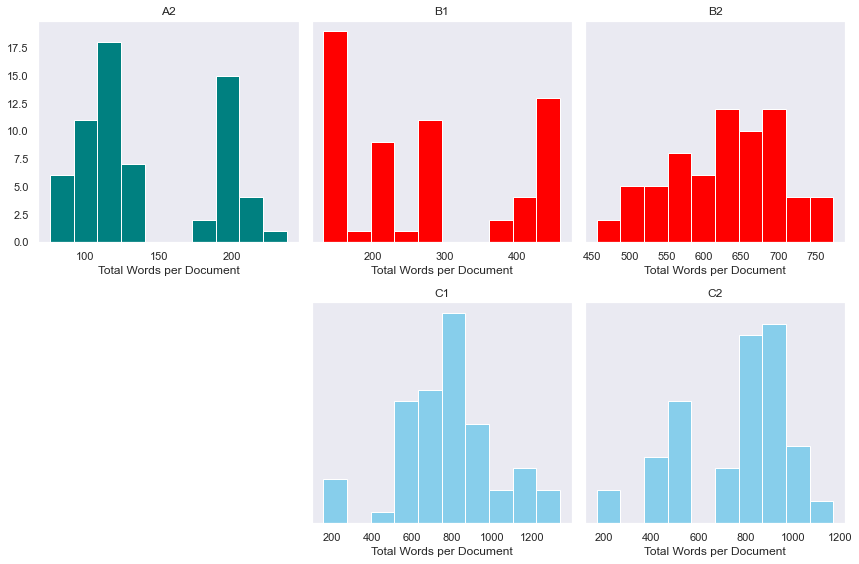

In [32]:
multi_plotter(data, 'cefr_level', 'total_words', 'Total Words per Document')

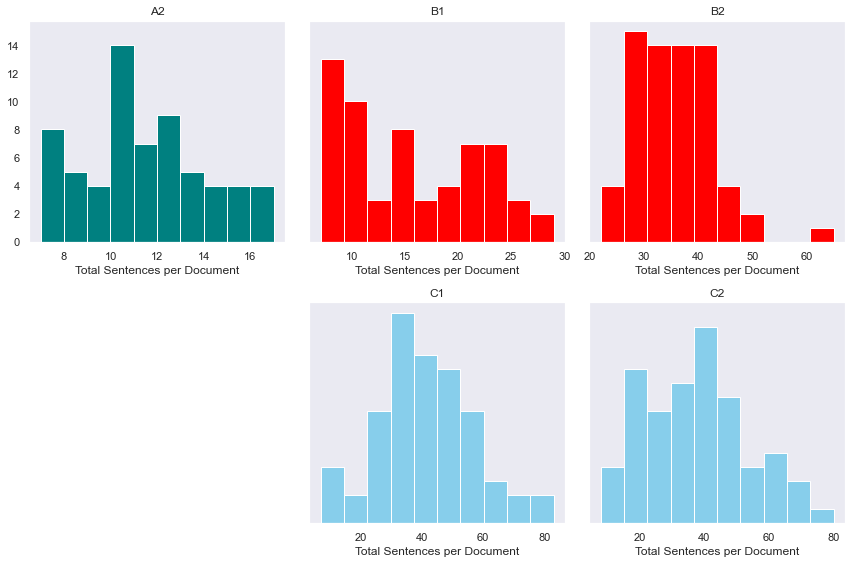

In [33]:
multi_plotter(data, 'cefr_level', 'total_sentences', 'Total Sentences per Document')

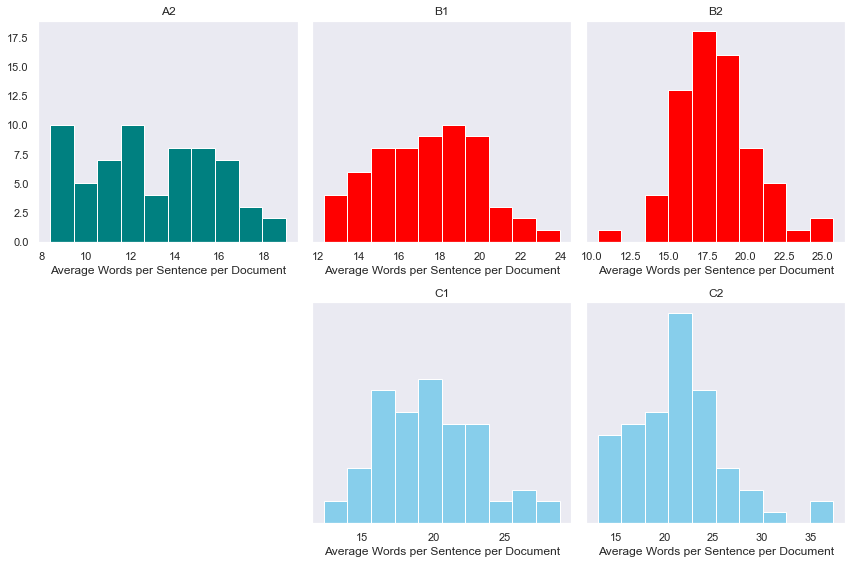

In [34]:
multi_plotter(data, 'cefr_level', 'avg_sent_len', 'Average Words per Sentence per Document')